In [2]:
!pip install pyshp

     |████████████████████████████████| 225kB 4.7MB/s eta 0:00:01
  Created wheel for pyshp: filename=pyshp-2.1.0-cp37-none-any.whl size=32609 sha256=67d24e6e7ed38fcfb6922f0b75772982dfc4f4d20df4d33f5410acfd530c7d50
  Stored in directory: /home/angelrps/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built pyshp


In [39]:
!pip install geopandas
!pip install descartes

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import geopandas as gpd
import seaborn as sns
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))

In [2]:
# opening the vector map
shp_path = "../z_resources/data_test/taxi_zones/taxi_zones.shp"
assert os.path.exists(shp_path), "Input file does not exist."

# set the filepath and load
fp = "../z_resources/data_test/taxi_zones/taxi_zones.shp"
#reading the file stored in variable fp
map_df = gpd.read_file(fp)

# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
print(type(map_df))
map_df.head(70)

<class 'geopandas.geodataframe.GeoDataFrame'>


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."
5,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.747 158679.855, 966615.256 15..."
6,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ..."
7,8,0.027591,0.000027,Astoria Park,8,Queens,"POLYGON ((1005482.276 221686.466, 1005304.898 ..."
8,9,0.099784,0.000338,Auburndale,9,Queens,"POLYGON ((1043803.993 216615.925, 1043849.708 ..."
9,10,0.099839,0.000436,Baisley Park,10,Queens,"POLYGON ((1044355.072 190734.321, 1044612.122 ..."


In [3]:
# filter Manhattan zones
map_df2 = map_df[map_df['borough'] == 'Manhattan']

# remove duplicated zone 103 (Liberty Island)
map_df2.drop([102,103], inplace=True)

map_df2.head(70)

/home/angelrps/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
11,12,0.036661,0.000042,Battery Park,12,Manhattan,"POLYGON ((979908.772 196066.565, 979980.852 19..."
12,13,0.050281,0.000149,Battery Park City,13,Manhattan,"POLYGON ((980801.310 201248.869, 980697.386 20..."
23,24,0.047000,0.000061,Bloomingdale,24,Manhattan,"POLYGON ((995453.114 230274.267, 995312.583 23..."
40,41,0.052793,0.000143,Central Harlem,41,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23..."
41,42,0.092709,0.000264,Central Harlem North,42,Manhattan,"POLYGON ((1002413.191 243934.560, 1002388.021 ..."
42,43,0.099739,0.000380,Central Park,43,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21..."
44,45,0.045907,0.000091,Chinatown,45,Manhattan,"POLYGON ((984941.821 199431.157, 984958.446 19..."
47,48,0.043747,0.000094,Clinton East,48,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21..."
49,50,0.055748,0.000173,Clinton West,50,Manhattan,"POLYGON ((985170.372 221087.389, 985817.170 22..."


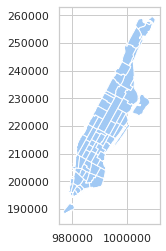

In [4]:
map_df2.plot()

In [5]:
data = pd.DataFrame({'RandVariable':np.random.randn(67)})

map_df2.reset_index(inplace=True, drop=True)
data.reset_index(inplace=True, drop=True)
print(map_df2.shape, data.shape)
display(map_df2.head(2), data.head(2))
map_df2 = map_df2.join(data)
map_df2.head()

(67, 7) (67, 1)


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
1,12,0.036661,0.000042,Battery Park,12,Manhattan,"POLYGON ((979908.772 196066.565, 979980.852 19..."


,RandVariable
0,-0.633609
1,-0.060280


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,RandVariable
0,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",-0.633609
1,12,0.036661,0.000042,Battery Park,12,Manhattan,"POLYGON ((979908.772 196066.565, 979980.852 19...",-0.060280
2,13,0.050281,0.000149,Battery Park City,13,Manhattan,"POLYGON ((980801.310 201248.869, 980697.386 20...",0.761702
3,24,0.047000,0.000061,Bloomingdale,24,Manhattan,"POLYGON ((995453.114 230274.267, 995312.583 23...",0.854531
4,41,0.052793,0.000143,Central Harlem,41,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23...",-0.261394


/home/angelrps/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:109: FutureWarning: `item` has been deprecated and will be removed in a future version
  ret = ex.item()


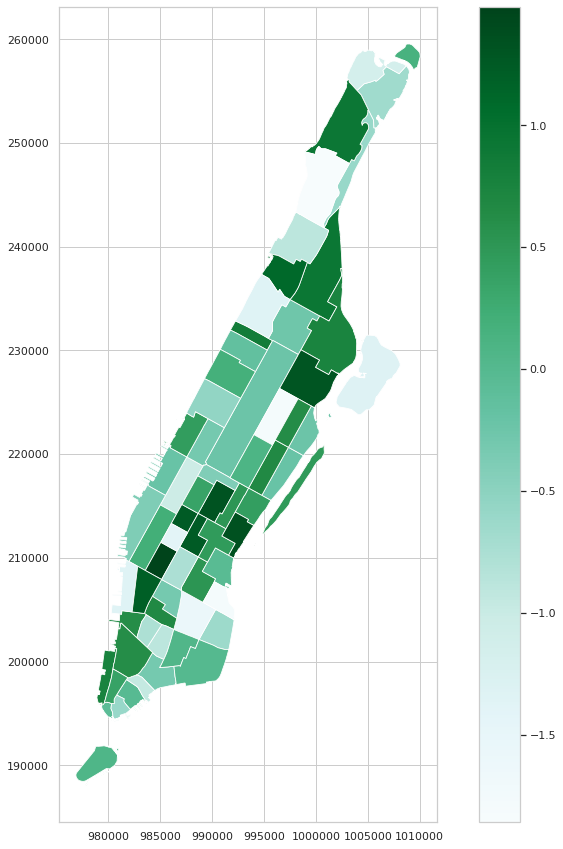

In [10]:
# set the range for the choropleth
vmin, vmax = data.min(), data.max()# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 15))

map_df2.plot(column='RandVariable', cmap='BuGn', linewidth=0.8, ax=ax, edgecolor='1')

# Create colorbar as a legend
colorBar = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# add the colorbar to the figure
cbar = fig.colorbar(colorBar)